In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
root_dir = Path.cwd().parent.parent
print(root_dir)

csv_save_name = 'femto_results_filtered.csv'

df = pd.read_csv(root_dir / 'models/final' / csv_save_name)
df.head()

/home/tim/Documents/weibull-knowledge-informed


,date_time,data_set,loss_func,rnd_seed_input,rnd_search_iter,rnd_search_iter_no,beta,eta,epochs,patience,...,weibull_loss,mse,rmse,rmsle,weibull_mse,weibull_rmse,weibull_rmsle,weibull_only_mse,weibull_only_rmse,weibull_only_rmsle
0,2021_04_06_21:34:43,femto,weibull_only_rmsle,5018061,3000,0,2.0,0.199977,2000,50,...,1,0,0,0,0,0,0,0,0,1
1,2021_04_06_18:22:55,femto,weibull_only_rmsle,1452705,3000,8,2.0,0.199977,2000,50,...,1,0,0,0,0,0,0,0,0,1
2,2021_04_06_17:27:06,femto,weibull_only_rmse,5373070,3000,7,2.0,0.199977,2000,50,...,1,0,0,0,0,0,0,0,1,0
3,2021_04_06_22:14:15,femto,weibull_only_rmse,1355603,3000,8,2.0,0.199977,2000,50,...,1,0,0,0,0,0,0,0,1,0
4,2021_04_06_22:05:45,femto,weibull_only_mse,2183353,3000,7,2.0,0.199977,2000,50,...,1,0,0,0,0,0,0,1,0,0


In [62]:
# apply 0 or 1 for weibull, and for each unique loss func
for index, value in df['prob_drop'].items():
    if value > 0:
        df.loc[index, 'prob_drop_true'] = 1
    else:
        df.loc[index, 'prob_drop_true'] = 0

# convert to 'weibull_loss' column to integer
df['prob_drop_true'] = df['prob_drop_true'].astype(int)

In [63]:
df.head()

,date_time,data_set,loss_func,rnd_seed_input,rnd_search_iter,rnd_search_iter_no,beta,eta,epochs,patience,...,mse,rmse,rmsle,weibull_mse,weibull_rmse,weibull_rmsle,weibull_only_mse,weibull_only_rmse,weibull_only_rmsle,prob_drop_true
0,2021_04_06_21:34:43,femto,weibull_only_rmsle,5018061,3000,0,2.0,0.199977,2000,50,...,0,0,0,0,0,0,0,0,1,1
1,2021_04_06_18:22:55,femto,weibull_only_rmsle,1452705,3000,8,2.0,0.199977,2000,50,...,0,0,0,0,0,0,0,0,1,0
2,2021_04_06_17:27:06,femto,weibull_only_rmse,5373070,3000,7,2.0,0.199977,2000,50,...,0,0,0,0,0,0,0,1,0,1
3,2021_04_06_22:14:15,femto,weibull_only_rmse,1355603,3000,8,2.0,0.199977,2000,50,...,0,0,0,0,0,0,0,1,0,1
4,2021_04_06_22:05:45,femto,weibull_only_mse,2183353,3000,7,2.0,0.199977,2000,50,...,0,0,0,0,0,0,1,0,0,1


In [100]:
df0 = df[df['weibull_loss']==0][['epoch_stopped_on']].describe()
df0 = df0.append(pd.DataFrame([df[df['weibull_loss']==0][['epoch_stopped_on']].median()],index=['median']))
df0.columns =['trad_loss_func']
df0

,trad_loss_func
count,106.000000
mean,57.188679
std,66.604892
min,1.000000
25%,9.250000
50%,36.500000
75%,89.000000
max,427.000000
median,36.500000


In [102]:
df1 = df[df['weibull_loss']==1][['epoch_stopped_on']].describe()
df1 = df1.append(pd.DataFrame([df[df['weibull_loss']==1][['epoch_stopped_on']].median()],index=['median']))
df1.columns =['weibull_loss_func']
df1

,weibull_loss_func
count,476.000000
mean,219.714286
std,333.584327
min,1.000000
25%,30.000000
50%,98.000000
75%,273.000000
max,1950.000000
median,98.000000


In [108]:
df_summary = df0.merge(df1, left_index=True, right_index=True)
df_summary

,trad_loss_func,weibull_loss_func
count,106.000000,476.000000
mean,57.188679,219.714286
std,66.604892,333.584327
min,1.000000,1.000000
25%,9.250000,30.000000
50%,36.500000,98.000000
75%,89.000000,273.000000
max,427.000000,1950.000000
median,36.500000,98.000000


In [33]:
df[df['weibull_loss']==0][['epoch_stopped_on']].median()

epoch_stopped_on    36.5
dtype: float64

In [24]:
df[['epoch_stopped_on']].describe().loc['count']

epoch_stopped_on    582.0
Name: count, dtype: float64

In [114]:
dfp = pd.read_csv(root_dir / 'models/final' / 'femto_results_filtered.csv')
dfi = pd.read_csv(root_dir / 'models/final' / 'ims_results_filtered.csv')

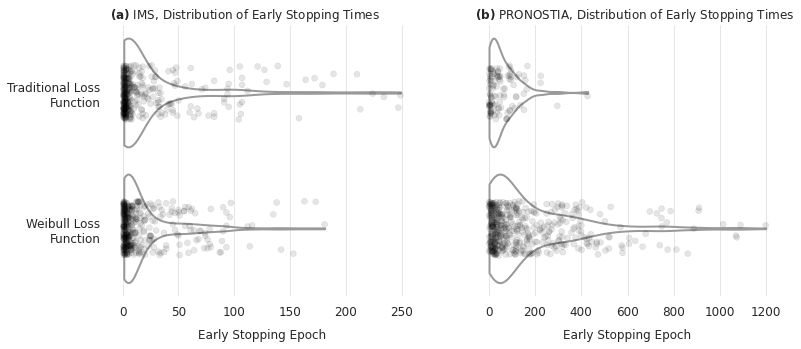

In [144]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5),)


title_list = [r"$\bf{(a)}$"+" IMS, Distribution of Early Stopping Times", 
              r"$\bf{(b)}$"+' PRONOSTIA, Distribution of Early Stopping Times']
df_list = [dfi, dfp]


sns.set(font_scale=1.0, style="whitegrid", font="DejaVu Sans")

for i , (ax, df, title) in enumerate(zip(axes.flat, df_list, title_list)):
    
    if i == 0:
        df = df[df['epoch_stopped_on']<250]
    else:
        df = df[df['epoch_stopped_on']<1250]

    ax = sns.violinplot(
            x="epoch_stopped_on",
            y='weibull_loss',
        data=df,
        scale='width',
            inner=None,
            linewidth=2,
            color="white",
            saturation=1,
            cut=0,
            orient="h",
            zorder=0,
            width=0.8,
        ax=ax
        )



        # strip plot
    ax = sns.stripplot(
            x="epoch_stopped_on",
            y='weibull_loss',
    #     hue='dob_yy',
        data=df,
            size=6,
            jitter=0.2,
            color="black",
            linewidth=0.5,
            marker="o",
            edgecolor=None,
            alpha=0.1,
    #         palette=customPalette,
            zorder=4,
            orient="h",
        ax=ax
        )
    if i == 0:
        ax.set_yticklabels(('Traditional Loss\nFunction', 'Weibull Loss\nFunction'), fontsize=12)
    else:
        ax.set_yticklabels([])
    
    ax.grid(axis='x', alpha=0.5)
    
    ax.yaxis.label.set_visible(False)
    ax.tick_params(axis='x', labelsize=12)
    ax.set_xlabel('Early Stopping Epoch',labelpad=10, fontsize=12)
    ax.set_title(title, fontsize=12, loc='left')
sns.despine(bottom=True,left=True)

In [ ]:
def early_stop_distribution_fig(path_ims_results, path_femto_results, path_save_name, dpi=300):
    """Visualize the distribution of when early stopping occured, by loss function"""
    dfi = pd.read_csv(path_ims_results)
    dfp = pd.read_csv(path_femto_results)
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

    title_list = [r"$\bf{(a)}$"+" IMS Distribution of Early Stopping Times", 
                  r"$\bf{(b)}$"+' PRONOSTIA Distribution of Early Stopping Times']
    df_list = [dfi, dfp]

    for i , (ax, df, title) in enumerate(zip(axes.flat, df_list, title_list)):

        if i == 0:
            df = df[df['epoch_stopped_on']<250]
        else:
            df = df[df['epoch_stopped_on']<1250]

        ax = sns.violinplot(
                x="epoch_stopped_on",
                y='weibull_loss',
            data=df,
            scale='width',
                inner=None,
                linewidth=2,
                color="white",
                saturation=1,
                cut=0,
                orient="h",
                zorder=0,
                width=0.8,
            ax=ax
            )



            # strip plot
        ax = sns.stripplot(
                x="epoch_stopped_on",
                y='weibull_loss',
        #     hue='dob_yy',
            data=df,
                size=6,
                jitter=0.2,
                color="black",
                linewidth=0.5,
                marker="o",
                edgecolor=None,
                alpha=0.1,
        #         palette=customPalette,
                zorder=4,
                orient="h",
            ax=ax
            )
        if i == 0:
            ax.set_yticklabels(('Traditional Loss\nFunctions', 'Weibull Loss\nFunctions'), fontsize=12)
        else:
            ax.set_yticklabels([])

        ax.grid(axis='x', alpha=0.5)

        ax.yaxis.label.set_visible(False)
        ax.tick_params(axis='x', labelsize=12)
        ax.set_xlabel('Early Stopping Epoch',labelpad=10, fontsize=12)
        ax.set_title(title, fontsize=12, loc='left')
    sns.despine(bottom=True,left=True)
    plt.savefig(path_save_name, dpi=dpi, bbox_inches="tight")
    plt.cla()
    plt.close()

In [147]:
path_ims_results = root_dir / 'models/final' / 'ims_results_filtered.csv'
path_femto_results = root_dir / 'models/final' / 'femto_results_filtered.csv'
path_save_name = 'test.png'

early_stop_distribution_fig(path_ims_results, path_femto_results, path_save_name, dpi=150)